In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [2]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [3]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

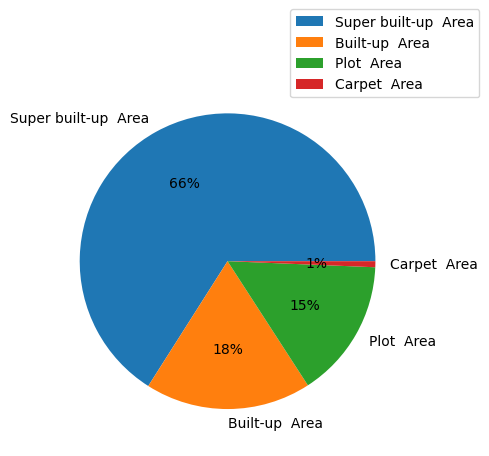

In [4]:
import matplotlib.pyplot as plt
area=df['area_type'].value_counts()
plt.pie(area,labels=area.index,autopct='%1.0f%%')
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1.2))
plt.show()

In [5]:
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [6]:
df.location.nunique()

1305

In [7]:
df['location'] = df['location'].str.strip()
df['location'].value_counts()

Whitefield                        541
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

In [8]:
location_counts = df['location'].value_counts()
locations_less_than_15 = location_counts[location_counts <= 15]

# Get the count of locations with less than 15 data points
count_less_than_15 = len(locations_less_than_15)

print("Count of locations with less than 15 data points:", count_less_than_15)

Count of locations with less than 15 data points: 1113


In [9]:
df['location'] = df['location'].apply(lambda x: 'other' if x in locations_less_than_15 else x)
df['location'].value_counts()

other                    3646
Whitefield                541
Sarjapur  Road            399
Electronic City           304
Kanakpura Road            273
                         ... 
Kereguddadahalli           16
Banashankari Stage VI      16
Cooke Town                 16
Kasturi Nagar              16
Parappana Agrahara         16
Name: location, Length: 182, dtype: int64

In [10]:
df.shape

(13320, 9)

In [11]:
df['BHK'] = df['size'].str.extract('(\d+)').astype(float)
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3.0


In [12]:
#In predicting Price of a property, 'availability' ,'balcony' and 'society' are not THAT important factor in comparison to other features
df=df.drop(['availability', 'society','size','balcony'], axis=1)

In [13]:
df.head()

,area_type,location,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3.0
4,Super built-up Area,Kothanur,1200,2.0,51.00,2.0


In [14]:
df.isnull().sum()

area_type      0
location       1
total_sqft     0
bath          73
price          0
BHK           16
dtype: int64

1, 16, 73 are negligible amount in front of 13320 enteries so we can drop, in the case of balcony : 609 we might wanna replace them with either mean or median depending on outliers

In [15]:
# Droping Missing Values
df.dropna(subset = ['location', 'BHK', 'bath'], inplace=True)

In [16]:
df.isnull().sum()

area_type     0
location      0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

In [17]:
df.total_sqft.nunique()

2067

In [18]:
# We can convert these values to float but values with ranges will give us error so we can create a filter type function

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df[~df['total_sqft'].apply(is_float)].sample(5)

,area_type,location,total_sqft,bath,price,BHK
6769,Super built-up Area,8th Phase JP Nagar,1408 - 1455,3.0,72.020,3.0
2716,Super built-up Area,JP Nagar,1300 - 1405,2.0,93.865,2.0
12544,Super built-up Area,Hebbal,4000 - 4450,6.0,359.000,4.0
6643,Super built-up Area,Whitefield,2830 - 2882,5.0,157.500,4.0
7001,Plot Area,other,1500Cents,6.0,290.000,8.0


In [19]:
import re

def range_to_sqft(value):
    # Check if the value contains a range
    if '-' in str(value):
        # If it's a range, calculate the average
        range_values = re.findall(r'\d+\.*\d*', str(value))
        range_values = [float(v) for v in range_values]
        return sum(range_values) / 2
    elif re.match(r'^\d+\.*\d*$', str(value)):
        # If it's a single value, return it as float
        return float(value)
    else:
        # Otherwise, return NaN for invalid values
        return None

In [20]:
range_to_sqft(850-1000)

75.0

In [21]:
df1=df.copy()

In [22]:
df1['total_sqft'] = df1['total_sqft'].apply(range_to_sqft)

In [23]:
df1['total_sqft'].isnull().sum()

46

In [24]:
df1 = df1.dropna(subset=['total_sqft'])

In [25]:
df1['total_sqft'].isnull().sum()

0

In [26]:
df1.shape

(13200, 6)

In [27]:
df2=df1.copy()
df2['price_per_sqft']=df2['price']*100000/df2['total_sqft']
df2.head(3)

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556


Now we have 2 Categorical values , They are required in encoding
Label encoding causes error in order of Data - which we cannot solve [as it depends on natural order of alphabets]
One-hot encoding can cause error in dimensions [increasing dimensions, known as dimensionality curse ]
we can decrease them by replacing those enteries which have low count
[as they will not be that significant in prediction] as others [Putting them in a general category]
area_type will not cause any problems
Have to check for location

**Outlier Detection and Removal**

In [28]:
import seaborn as sns

**Problem in total_sqft, bathroom, price, BHK and price_per_sqft**


 **->total_sqft**

In [29]:
df2['total_sqft'].describe()

count    13200.000000
mean      1555.302783
std       1237.323445
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1672.000000
max      52272.000000
Name: total_sqft, dtype: float64

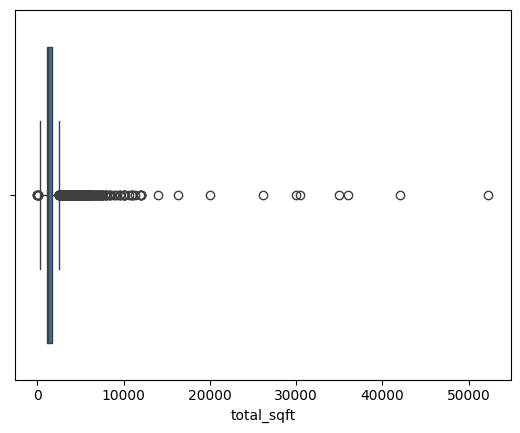

In [30]:
sns.boxplot(x='total_sqft', data=df2)
plt.show()

In [31]:
# Calculate quartiles and IQR
Q1 = df2['total_sqft'].quantile(0.25)
Q3 = df2['total_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df2 = df2[(df2['total_sqft'] >= lower_bound) & (df2['total_sqft'] <= upper_bound)]

In [32]:
df2['total_sqft'].describe()

count    12051.000000
mean      1321.606243
std        413.141702
min        250.000000
25%       1080.000000
50%       1234.600000
75%       1540.000000
max       2526.000000
Name: total_sqft, dtype: float64

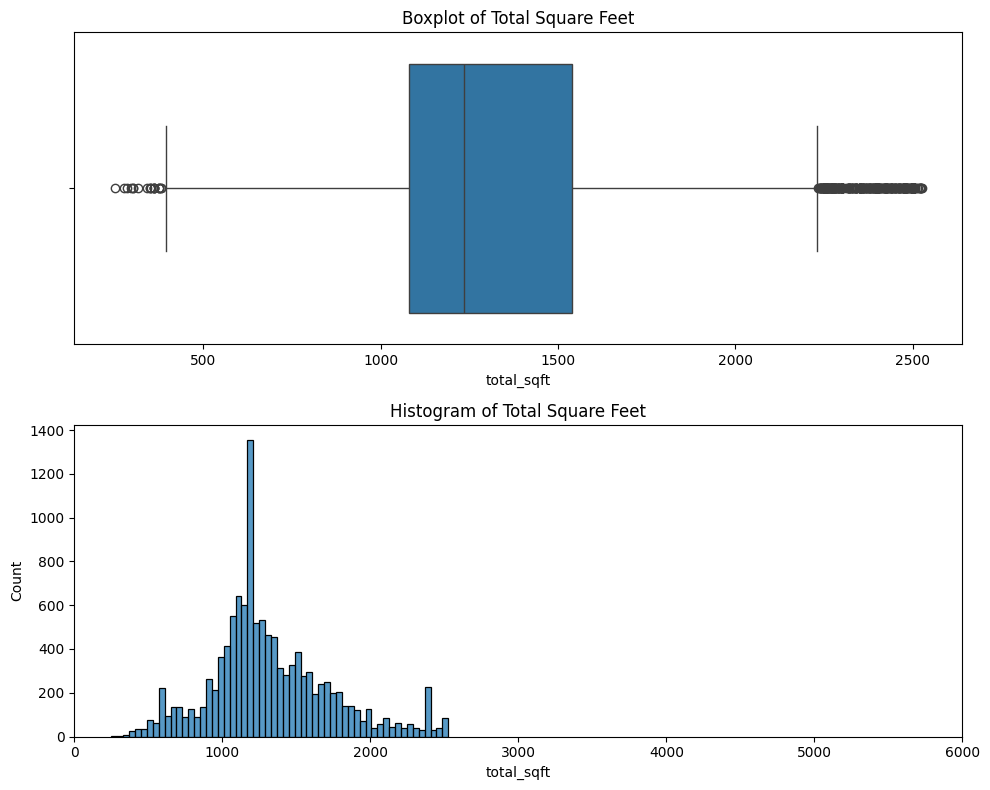

In [33]:
# Create a figure and axes
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
# Plot boxplot
sns.boxplot(x='total_sqft', data=df2, ax=axs[0])
axs[0].set_title('Boxplot of Total Square Feet')
# Plot histogram
sns.histplot(x='total_sqft', data=df2, ax=axs[1])
axs[1].set_title('Histogram of Total Square Feet')
axs[1].set_xlim([0, 6000])

# Adjust layout
plt.tight_layout()
plt.show()

**->price_per_sqft**

In [34]:
df2['price_per_sqft'].describe()

count     12051.000000
mean       6430.839724
std        4297.945956
min         500.000000
25%        4201.185164
50%        5284.552846
75%        6944.444444
max      176470.588235
Name: price_per_sqft, dtype: float64

In [35]:
# Calculate mean and standard deviation
mean_price_per_sqft = df2['price_per_sqft'].mean()
std_price_per_sqft = df2['price_per_sqft'].std()

# Define lower and upper bounds for outliers
lower_bound = mean_price_per_sqft - std_price_per_sqft
upper_bound = mean_price_per_sqft + std_price_per_sqft

# Remove outliers
df2 = df2[(df2['price_per_sqft'] >= lower_bound) & (df2['price_per_sqft'] <= upper_bound)]


In [36]:
df2['price_per_sqft'].describe()

count    10807.000000
mean      5347.468340
std       1683.539327
min       2153.846154
25%       4097.583434
50%       5037.037037
75%       6302.878903
max      10720.000000
Name: price_per_sqft, dtype: float64

In [37]:
df2.shape

(10807, 7)

**->Bathroom**

In [38]:
df2.rename(columns={'bath': 'bathroom'}, inplace=True)

<ipython-input-38-a29e3fcda111>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'bath': 'bathroom'}, inplace=True)


in a General Real Esate Property / House, the number of Bathrooms depends on number of Bedrooms [BHK]. The equations in general is

total Bathroom <= BHK + 1 [1 - extra for Guest]

It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [39]:
df2[~(df2['bathroom'] < (df2['BHK'] + 2))].shape

(22, 7)

In [40]:
df2.shape

(10807, 7)

In [41]:
df2=df2[(df2['bathroom']<(df2['BHK'] + 2)) & (df2['bathroom'] <= 5)]    #also more than 5 bathrooms ignored
df2.shape

(10698, 7)

In [42]:
df2['bathroom'].describe()

count    10698.000000
mean         2.305384
std          0.695161
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: bathroom, dtype: float64

**->price**

In [43]:
df2['price'].describe()

count    10698.000000
mean        71.824107
std         36.552102
min          8.000000
25%         46.000000
50%         62.615000
75%         88.000000
max        268.000000
Name: price, dtype: float64

**->BHK**

In [44]:
df2['BHK'].describe()

count    10698.000000
mean         2.454010
std          0.726241
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: BHK, dtype: float64

In [45]:
df2.sample(5)

,area_type,location,total_sqft,bathroom,price,BHK,price_per_sqft
5091,Built-up Area,Hosa Road,972.0,2.0,40.00,2.0,4115.226337
8530,Super built-up Area,Budigere,1820.0,3.0,85.00,3.0,4670.329670
1957,Super built-up Area,Kogilu,1200.0,2.0,53.33,2.0,4444.166667
5852,Super built-up Area,Jalahalli,2384.0,4.0,165.00,3.0,6921.140940
8626,Super built-up Area,Raja Rajeshwari Nagar,1295.0,2.0,55.47,2.0,4283.397683


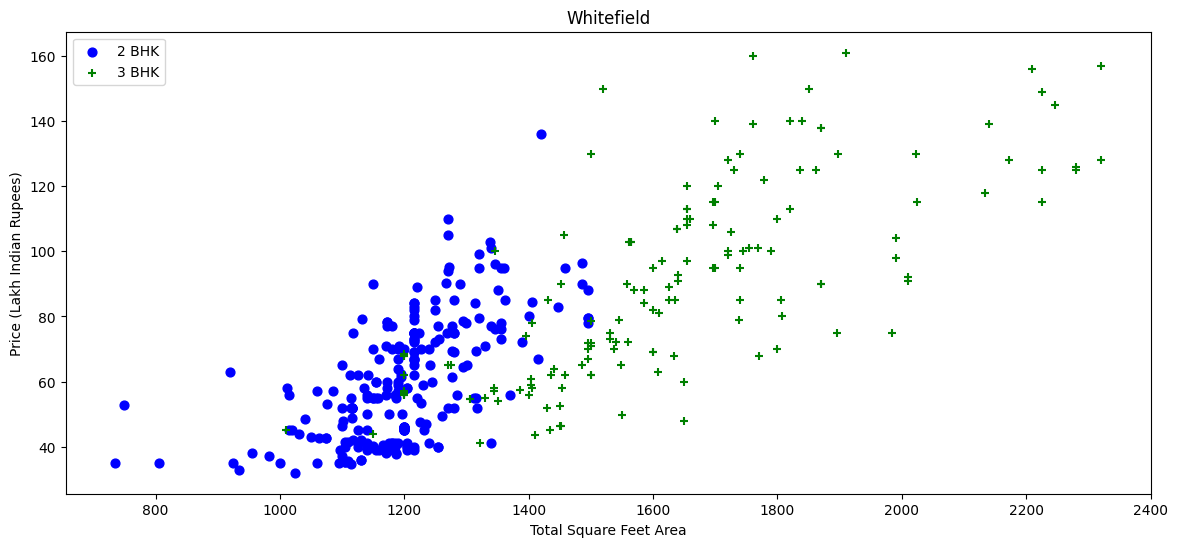

In [46]:
import matplotlib.pyplot as plt

def plot_scatter_chart(df2, location):
    # Filter data for the given location and both 2 BHK and 3 BHK properties
    bhk2 = df2[(df2.location == location) & (df2.BHK == 2)]
    bhk3 = df2[(df2.location == location) & (df2.BHK == 3)]
    plt.figure(figsize=(14, 6))


    # Plot scatter chart for both 2 BHK and 3 BHK properties
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=40)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=40)

    # Set labels and title
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)

    # Add legend
    plt.legend()

# Example usage:
plot_scatter_chart(df2, 'Whitefield')
plt.show()


Here Prices of 2bhk are more than 3bhk for similar or same total_sqft area, it means price_per_sqft of 2bhk should be more than 3bhk for the same location and similar total_sqft area

So now we can remove those 3BHK whose price_per_sqft is less than mean price_per_sqft of 2 BHK

We here are dealing with same location [ because Different Location will affect the price ]

In [47]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis=0)
df3 = remove_bhk_outliers(df2)
df3.shape

(7373, 7)

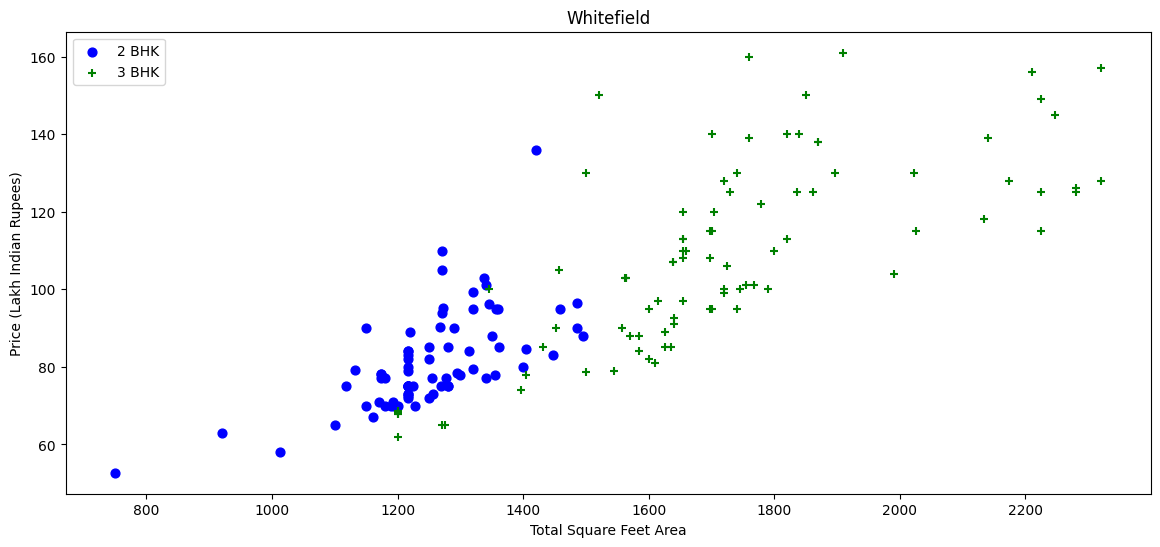

In [48]:
import matplotlib.pyplot as plt

def plot_scatter_chart(df2, location):
    # Filter data for the given location and both 2 BHK and 3 BHK properties
    bhk2 = df2[(df2.location == location) & (df2.BHK == 2)]
    bhk3 = df2[(df2.location == location) & (df2.BHK == 3)]
    plt.figure(figsize=(14, 6))


    # Plot scatter chart for both 2 BHK and 3 BHK properties
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=40)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=40)

    # Set labels and title
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)

    # Add legend
    plt.legend()

# Example usage:
plot_scatter_chart(df3, 'Whitefield')
plt.show()


In [49]:
df3.shape

(7373, 7)

**Lets correlate**

In [50]:
df3_corr = df3[['total_sqft', 'bathroom', 'BHK']].corr()
df3_corr

,total_sqft,bathroom,BHK
total_sqft,1.000000,0.709823,0.664147
bathroom,0.709823,1.000000,0.841670
BHK,0.664147,0.841670,1.000000


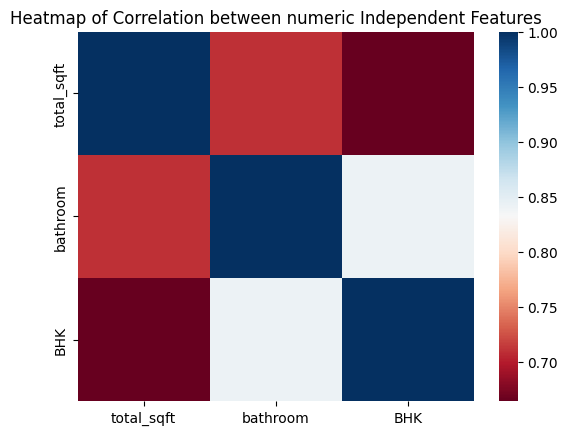

In [51]:
sns.heatmap(df3_corr, cmap='RdBu')
plt.title("Heatmap of Correlation between numeric Independent Features")
plt.show()

In [52]:
df3.rename(columns={'BHK': 'bedroom'}, inplace=True)
df3.drop(['price_per_sqft','area_type'], axis=1, inplace=True)

In [53]:
df3.head(10)

,location,total_sqft,bathroom,price,bedroom
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
2,Uttarahalli,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Kothanur,1200.0,2.0,51.00,2.0
12,7th Phase JP Nagar,1000.0,2.0,38.00,2.0
13,Gottigere,1100.0,2.0,40.00,2.0
14,Sarjapur,2250.0,3.0,148.00,3.0
15,Mysore Road,1175.0,2.0,73.50,2.0
16,Bisuvanahalli,1180.0,3.0,48.00,3.0
20,Kengeri,600.0,1.0,15.00,1.0


**Model Building - ENCODING**

In [54]:
dummies = pd.get_dummies(df3['location'])
dummies

,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df4 = pd.concat([df3, dummies.drop('other',axis=1)], axis=1)
df4.head(3)

,location,total_sqft,bathroom,price,bedroom,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df5=df4.drop(['location'], axis=1)
df5.head(2)

,total_sqft,bathroom,price,bedroom,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1056.0,2.0,39.07,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Model creation

In [57]:
x=df5.drop('price',axis=1)
x.head(3)

,total_sqft,bathroom,bedroom,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1056.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
y=df5['price']
y.head(3)

0    39.07
2    62.00
3    95.00
Name: price, dtype: float64

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Assuming x_train, y_train, x_test, y_test are your training and testing data

# Create a linear regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(x_train, y_train)

# Perform cross-validation
cross_val_scores = cross_val_score(linear_model, x_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)

Cross-validation scores: [0.80926229 0.8088487  0.7981602  0.80730224 0.80310311]


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)

# Define the parameters grid for each model
param_grid_lr = {}
param_grid_dt = {'max_depth': [None, 5, 10, 15]}
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10]}

# Create instances of each model
models = [
    ('Linear Regression', LinearRegression(), param_grid_lr),
    ('Decision Tree', DecisionTreeRegressor(), param_grid_dt),
    ('Random Forest', RandomForestRegressor(), param_grid_rf)
]

# Perform GridSearchCV for each model
best_models = {}
for name, model, param_grid in models:
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train)
    best_models[name] = grid_search

# Find the model with the best CV score
best_model_name = max(best_models, key=lambda k: best_models[k].best_score_)
print(f"The best model is: {best_model_name}")


The best model is: Linear Regression


In [66]:
def predict_price(location, sqft, bathroom, bedroom):
    # Find the index of the location in the feature matrix
    loc_index = np.where(x.columns==location)[0][0]

    # Create an array initialized with zeros
    inputs = np.zeros(len(x.columns))

    # Fill in the features
    inputs[0] = sqft
    inputs[1] = bathroom
    inputs[2] = bedroom

    # If the location index is valid, set the corresponding element to 1
    if loc_index >=0:
        inputs[loc_index] = 1

    # Predict the price using the linear model
    return round(linear_model.predict([inputs])[0], 2)


In [72]:
predict_price('Uttarahalli',1500,3,4)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.1

In [73]:
# Save the trained model to a file
import pickle
with open('bengaluru_house_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [76]:
import json
# Convert column names to lowercase
columns = [column.lower() for column in x.columns]

# Save the lowercase column names to a JSON file
with open('columns.json', 'w') as file:
    json.dump(columns, file)